In [2]:
# Dataset Structure
import os

# Define paths
base_path = "C:/Users/sirajje/Desktop/new egg dataset"
train_image_folder = os.path.join(base_path, "train")
valid_image_folder = os.path.join(base_path, "valid")
test_image_folder = os.path.join(base_path, "test")

# Count number of images in each folder
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))])

train_image_count = count_images(train_image_folder)
valid_image_count = count_images(valid_image_folder)
test_image_count = count_images(test_image_folder)

print(f"Train Images: {train_image_count}")
print(f"Validation Images: {valid_image_count}")
print(f"Test Images: {test_image_count}")

Train Images: 1867
Validation Images: 74
Test Images: 77


In [3]:
# Label Distribution
from pycocotools.coco import COCO

# Load COCO annotations
train_ann_file = os.path.join(base_path, "train/_annotations.coco.json")
valid_ann_file = os.path.join(base_path, "valid/_annotations.coco.json")
test_ann_file = os.path.join(base_path, "test/_annotations.coco.json")

train_coco = COCO(train_ann_file)
valid_coco = COCO(valid_ann_file)
test_coco = COCO(test_ann_file)

# Get class distribution
def get_class_distribution(coco):
    categories = coco.loadCats(coco.getCatIds())
    category_counts = {cat['name']: 0 for cat in categories}
    for ann_id in coco.getAnnIds():
        ann = coco.loadAnns(ann_id)[0]
        cat_name = coco.loadCats(ann['category_id'])[0]['name']
        category_counts[cat_name] += 1
    return category_counts

train_class_dist = get_class_distribution(train_coco)
valid_class_dist = get_class_distribution(valid_coco)
test_class_dist = get_class_distribution(test_coco)

print("Train Class Distribution:", train_class_dist)
print("Validation Class Distribution:", valid_class_dist)
print("Test Class Distribution:", test_class_dist)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Train Class Distribution: {'fertile-infertile': 0, 'fertile': 1975, 'infertile': 1449}
Validation Class Distribution: {'fertile-infertile': 0, 'fertile': 126, 'infertile': 61}
Test Class Distribution: {'fertile-infertile': 0, 'fertile': 67, 'infertile': 69}


In [4]:
# Image Properties
import cv2
import numpy as np

def analyze_image_properties(image_folder):
    widths = []
    heights = []
    aspect_ratios = []
    color_channels = []

    for img_file in os.listdir(image_folder):
        if img_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(image_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w, c = img.shape
                widths.append(w)
                heights.append(h)
                aspect_ratios.append(w / h)
                color_channels.append(c)

    print(f"Image Widths: Min={min(widths)}, Max={max(widths)}")
    print(f"Image Heights: Min={min(heights)}, Max={max(heights)}")
    print(f"Aspect Ratios: Min={min(aspect_ratios)}, Max={max(aspect_ratios)}")
    print(f"Color Channels: {set(color_channels)}")

# Analyze train set
print("Train Image Properties:")
analyze_image_properties(train_image_folder)

# Analyze validation set
print("Validation Image Properties:")
analyze_image_properties(valid_image_folder)

# Analyze test set
print("Test Image Properties:")
analyze_image_properties(test_image_folder)

Train Image Properties:
Image Widths: Min=224, Max=224
Image Heights: Min=224, Max=224
Aspect Ratios: Min=1.0, Max=1.0
Color Channels: {3}
Validation Image Properties:
Image Widths: Min=224, Max=224
Image Heights: Min=224, Max=224
Aspect Ratios: Min=1.0, Max=1.0
Color Channels: {3}
Test Image Properties:
Image Widths: Min=224, Max=224
Image Heights: Min=224, Max=224
Aspect Ratios: Min=1.0, Max=1.0
Color Channels: {3}


Visualizing random images from the train set:


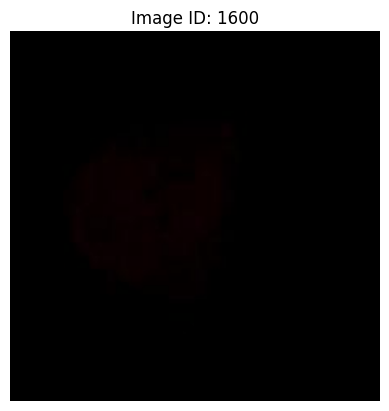

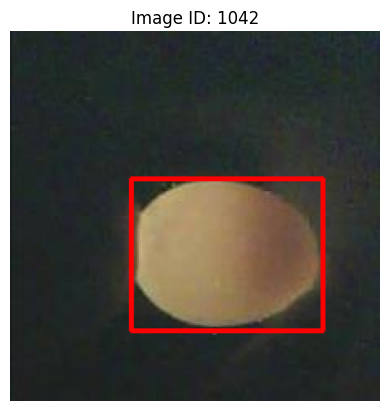

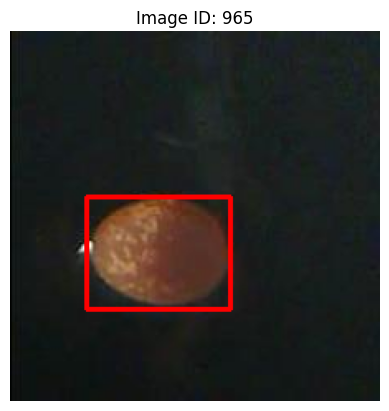

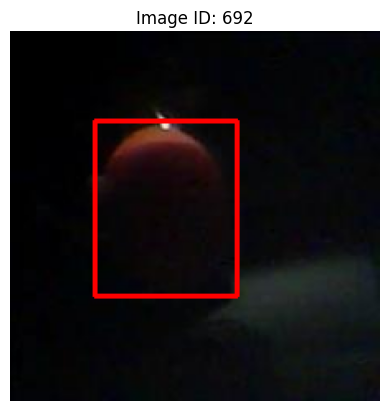

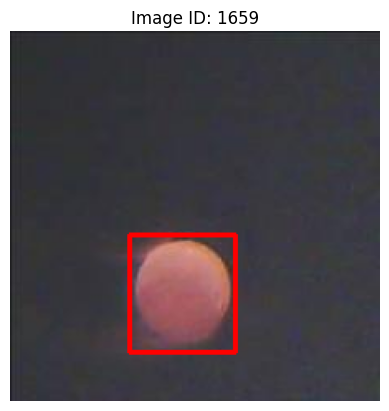

Visualizing random images from the validation set:


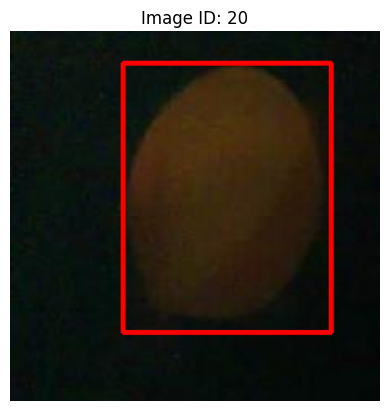

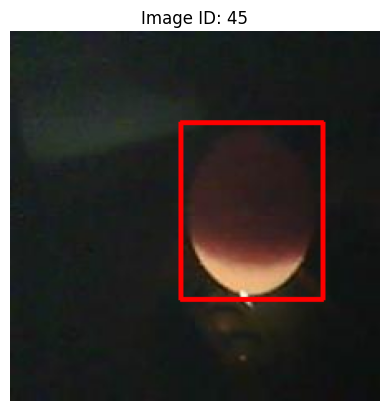

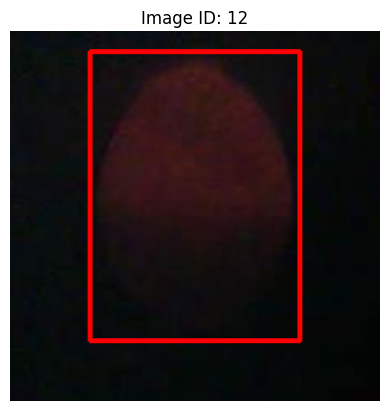

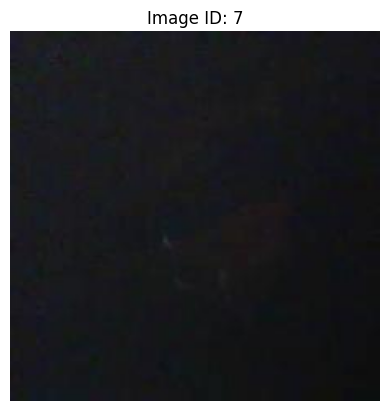

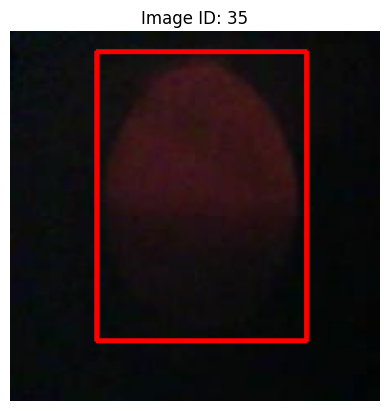

Visualizing random images from the test set:


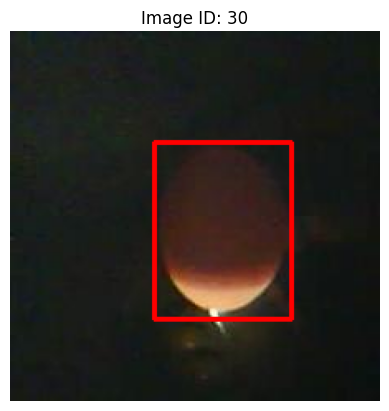

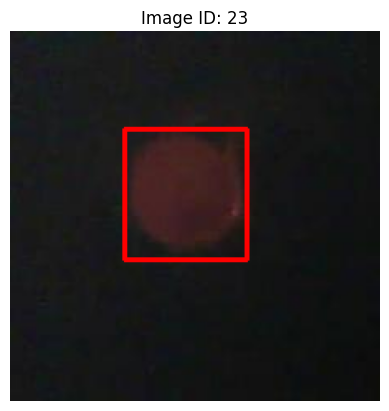

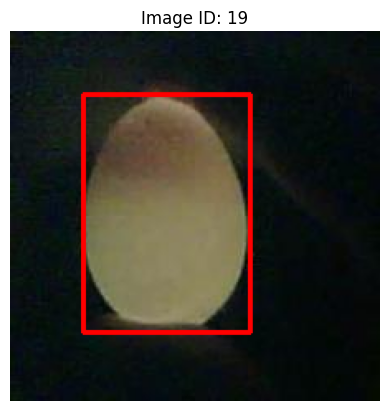

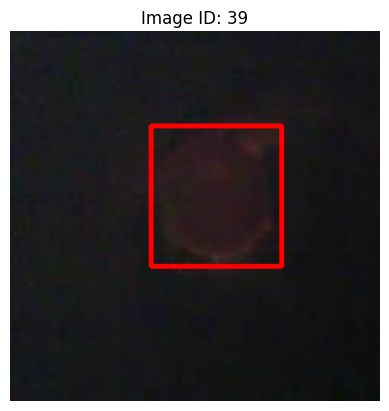

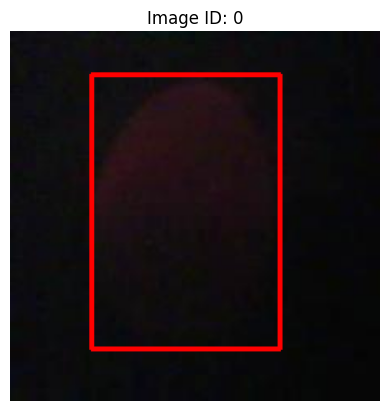

In [5]:
#  Sample Visualization
import random
import matplotlib.pyplot as plt

def visualize_random_images(coco, image_folder, num_samples=5):
    image_ids = coco.getImgIds()
    for _ in range(num_samples):
        img_id = random.choice(image_ids)
        img_info = coco.loadImgs(img_id)[0]
        img_path = os.path.join(image_folder, img_info['file_name'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Get annotations
        ann_ids = coco.getAnnIds(imgIds=img_id)
        annotations = coco.loadAnns(ann_ids)

        # Draw bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            x, y, w, h = map(int, bbox)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        plt.imshow(img)
        plt.title(f"Image ID: {img_id}")
        plt.axis("off")
        plt.show()

# Visualize random images from train set
print("Visualizing random images from the train set:")
visualize_random_images(train_coco, train_image_folder)

# Visualize random images from validation set
print("Visualizing random images from the validation set:")
visualize_random_images(valid_coco, valid_image_folder)

# Visualize random images from test set
print("Visualizing random images from the test set:")
visualize_random_images(test_coco, test_image_folder)